# UNEMPLOYMENT ANALYSIS WITH PYTHON

## Importing Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Collection and Processing

In [107]:
dataset = pd.read_csv('Unemployment in India.csv')

In [108]:
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [109]:
dataset.shape

(768, 7)

In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [111]:
dataset.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [112]:
dataset = dataset.dropna()          #Since there are rows with null values, we are removing them.

In [113]:
dataset.shape

(740, 7)

In [114]:
dataset.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

## Data Analysis

In [115]:
dataset.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## Visualizing the Data

In [116]:
dataset.Region.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [117]:
dataset.Area.value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

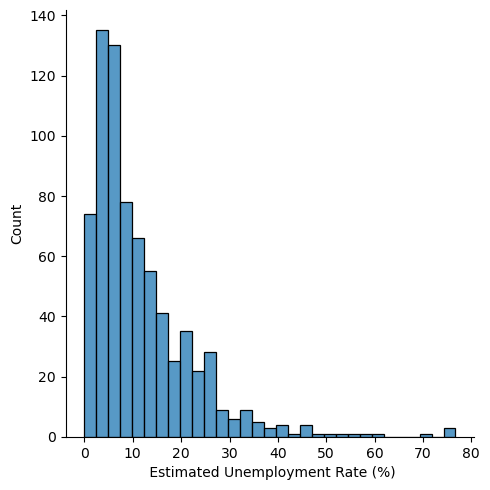

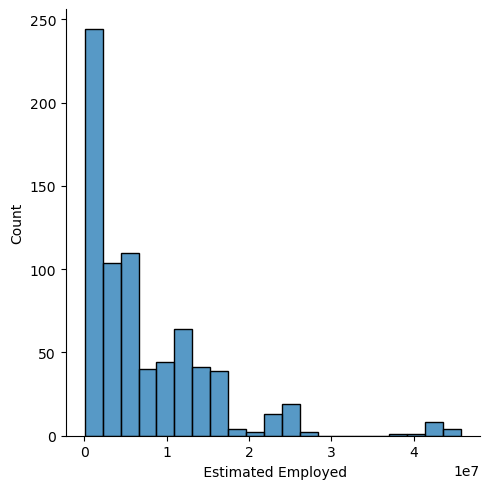

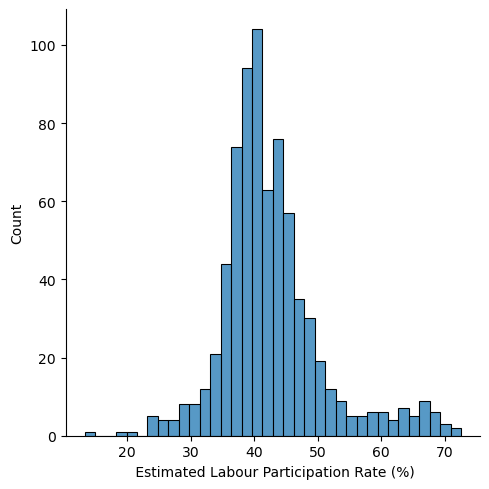

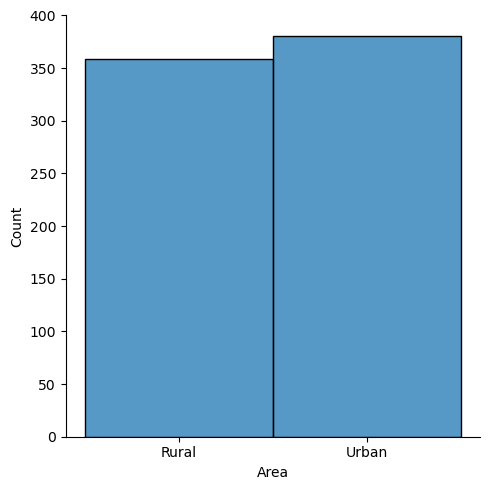

In [118]:
#Distribution Plots

sns.displot(dataset[' Estimated Unemployment Rate (%)'])
sns.displot(dataset[' Estimated Employed'])
sns.displot(dataset[' Estimated Labour Participation Rate (%)'])
sns.displot(dataset['Area'])

## Co-relation between Columns

In [119]:
correlation = dataset.corr()

C:\Users\purna\AppData\Local\Temp\ipykernel_15632\3698212406.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

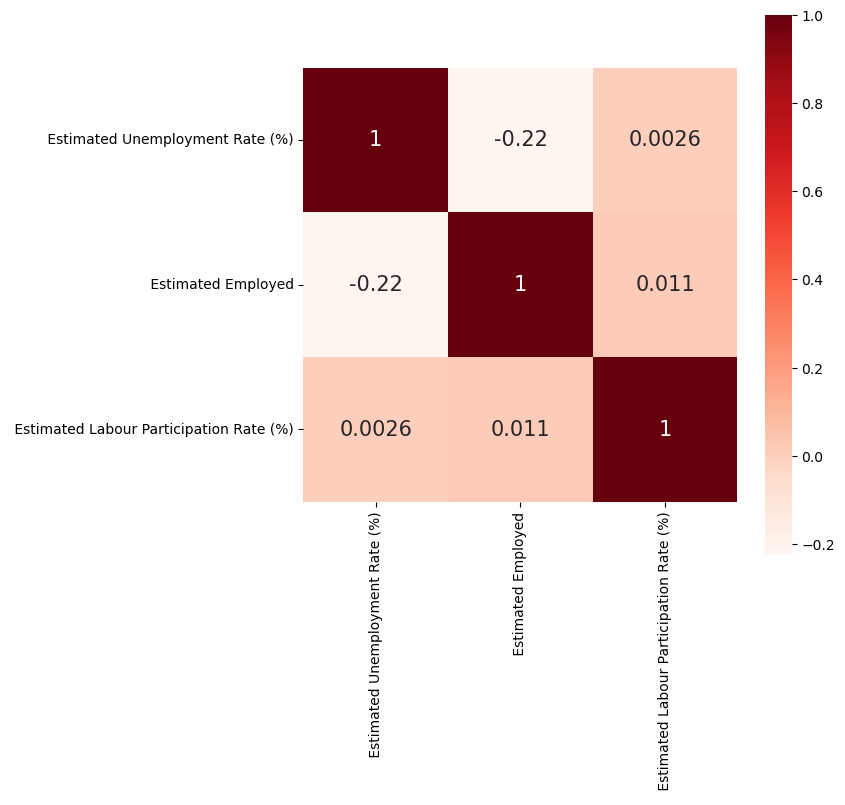

In [120]:
plt.figure(figsize = (7,7))

sns.heatmap(correlation, square = True, annot = True, annot_kws = {'size': 15}, cmap = 'Reds')

<Axes: xlabel=' Estimated Employed', ylabel='Count'>

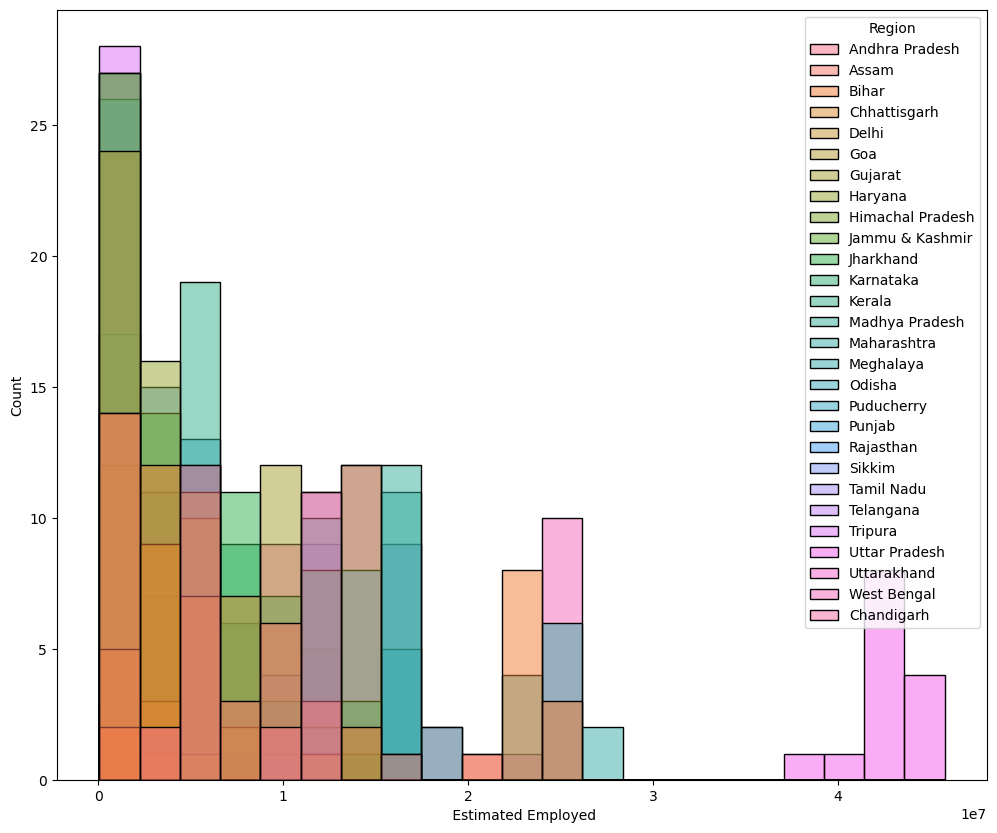

In [121]:
plt.figure(figsize = (12,10))
sns.histplot(x = " Estimated Employed", hue = "Region", data = dataset)

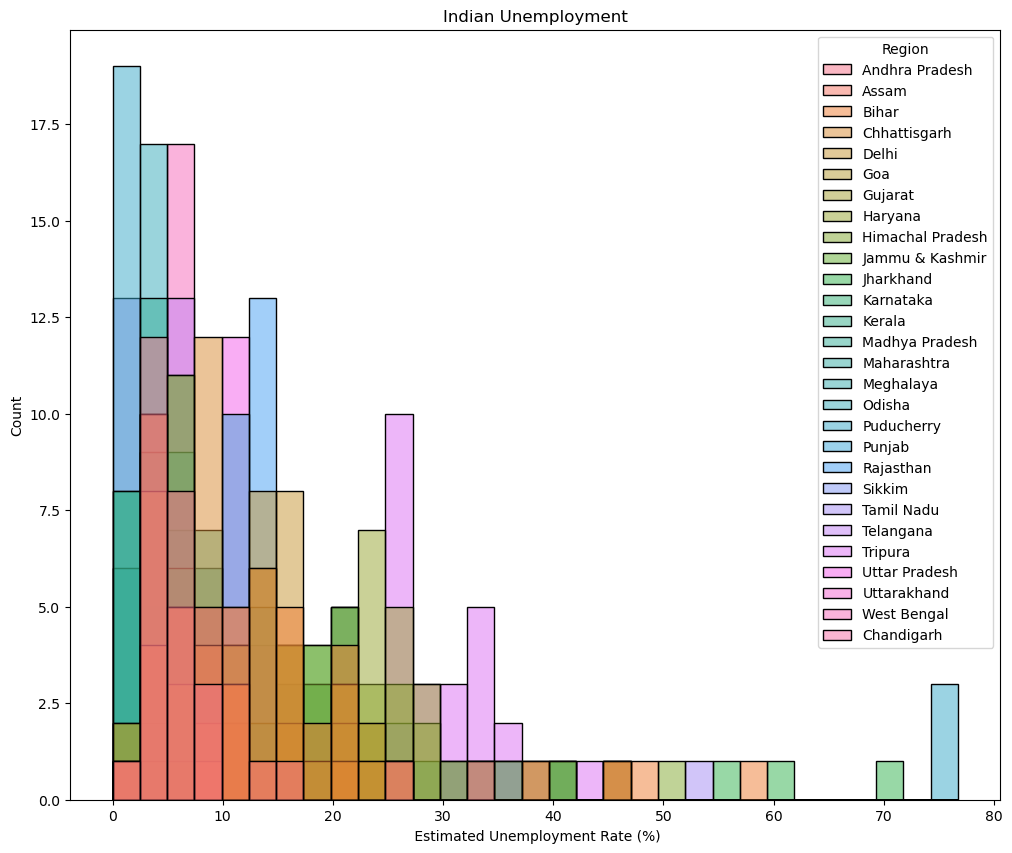

In [122]:
plt.figure(figsize = (12,10))
plt.title("Indian Unemployment")
sns.histplot(x = " Estimated Unemployment Rate (%)", hue = "Region", data = dataset)
plt.show()

In [123]:
unemployment = dataset[["Region", " Estimated Unemployment Rate (%)"]]
fig = px.sunburst(unemployment, path = ["Region"], values = " Estimated Unemployment Rate (%)",
                 width = 700, height = 700, color_continuous_scale = "RdY1Gn",
                 title = "Unemployment Rate in India")
fig.show()


## By hovering over a particular state, we get the Estimated Unemployment Rate.